In [1]:
import torch
from torch import nn
from torchvision import transforms
from torchvision import models
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter
from PIL import ImageOps
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from copy import copy
from copy import deepcopy
import sys
import os
import cv2
import pandas as pd
import numpy as np
import random
from pathlib import Path

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' # dead kernel for matplotlib

In [2]:
metadata = pd.read_csv('../doby_meta.csv')
metadata = metadata[metadata['subject_id'] < 16000000]
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 4197
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subject_id      4198 non-null   int64 
 1   study_id        4198 non-null   int64 
 2   dicom_id        4198 non-null   object
 3   DicomPath       4198 non-null   object
 4   edema_severity  4198 non-null   int64 
 5   normal          4198 non-null   int64 
 6   CHF             4198 non-null   bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 233.7+ KB


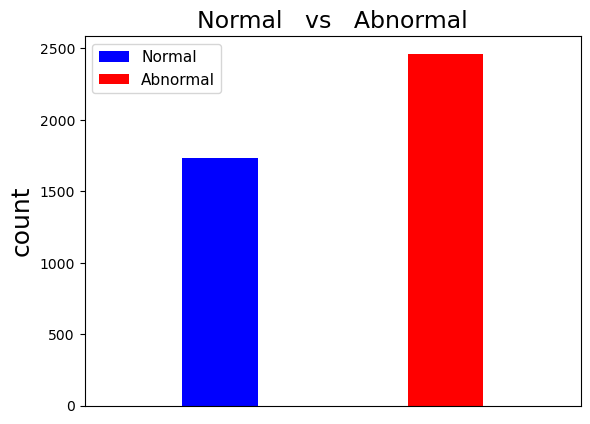

In [72]:
normal = metadata[metadata['normal'] == 0]
pul_edema = metadata[metadata['normal'] == 1]
plt.hist(normal['normal'], color='blue', label='Normal', bins=3)
plt.hist(pul_edema['normal'], color='red', label='Abnormal', bins=3)

plt.ylabel('count', fontsize=18)
plt.xticks()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend(fontsize=11)
plt.title('Normal   vs   Abnormal', fontsize=17)

plt.savefig('./figure5.jpg', dpi=500, pad_inches=0)
plt.show()

In [66]:
print(normal.count(), pul_edema.count())

subject_id        1735
study_id          1735
dicom_id          1735
DicomPath         1735
edema_severity    1735
normal            1735
CHF               1735
dtype: int64 subject_id        2463
study_id          2463
dicom_id          2463
DicomPath         2463
edema_severity    2463
normal            2463
CHF               2463
dtype: int64
